In [9]:
pip install openpyxl

     ------------------------------------ 250.0/250.0 kB 365.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Loading the Dataset
data = pd.read_excel("OnlineRetail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Pre-Processing**

1. **Null Values**

In [3]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
#Handling Null Values
value = data['Description'].mode()[0]  
data['Description'].fillna(value, inplace=True) 

In [6]:
data.dropna(subset=['CustomerID'], inplace=True)

In [7]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

2. **Outliers**

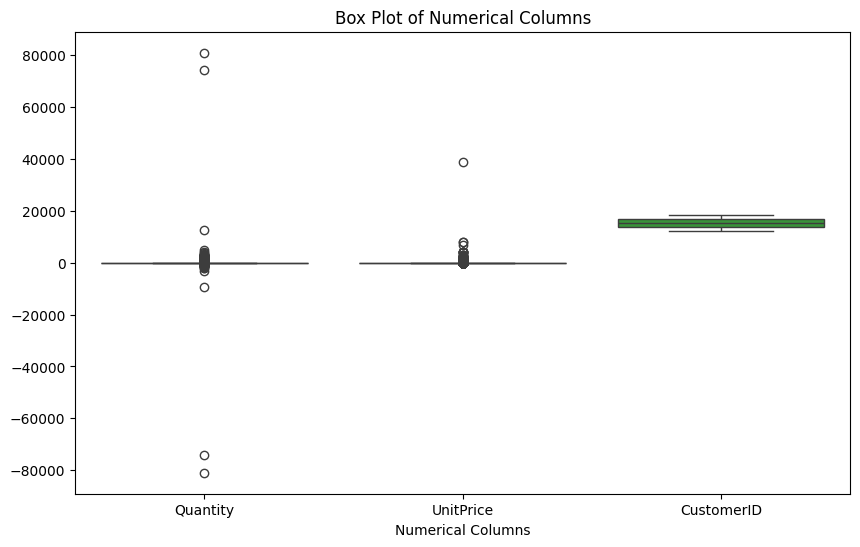

In [8]:
#Checking Outliers
numerical_columns = ['Quantity' , 'UnitPrice' , 'CustomerID']
plt.figure(figsize=(10, 6))
sns.boxplot(data[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.show()

In [9]:
#Handling Outliers
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

rows = set(data[outliers].index)
data_cleaned = data[~data.index.isin(rows)]
data = data_cleaned
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


3. **Normlization**

In [10]:
min_max = MinMaxScaler()
data[numerical_columns] = min_max.fit_transform(data[numerical_columns])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.475,2010-12-01 08:26:00,0.340000,0.926431,United Kingdom
1,536365,71053,WHITE METAL LANTERN,0.475,2010-12-01 08:26:00,0.452000,0.926431,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.525,2010-12-01 08:26:00,0.366667,0.926431,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.475,2010-12-01 08:26:00,0.452000,0.926431,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.475,2010-12-01 08:26:00,0.452000,0.926431,United Kingdom


4. **Categorical Variables**

In [11]:
categorical_columns = ['InvoiceNo' , 'StockCode' , 'Description' , 'Country']
data['Country'] = data['Country'].astype('str')
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data['StockCode'] = data['StockCode'].astype('str')
data['Description'] = data['Description'].astype('str')
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])
    
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3039,3432,0.475,2010-12-01 08:26:00,0.340000,0.926431,35
1,0,2478,3440,0.475,2010-12-01 08:26:00,0.452000,0.926431,35
2,0,2677,784,0.525,2010-12-01 08:26:00,0.366667,0.926431,35
3,0,2629,1673,0.475,2010-12-01 08:26:00,0.452000,0.926431,35
4,0,2628,2568,0.475,2010-12-01 08:26:00,0.452000,0.926431,35


In [12]:
data['InvoiceDate'] = data['InvoiceDate'].astype(np.int64) // 10**9

**Part - a : 10.1**

c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-p

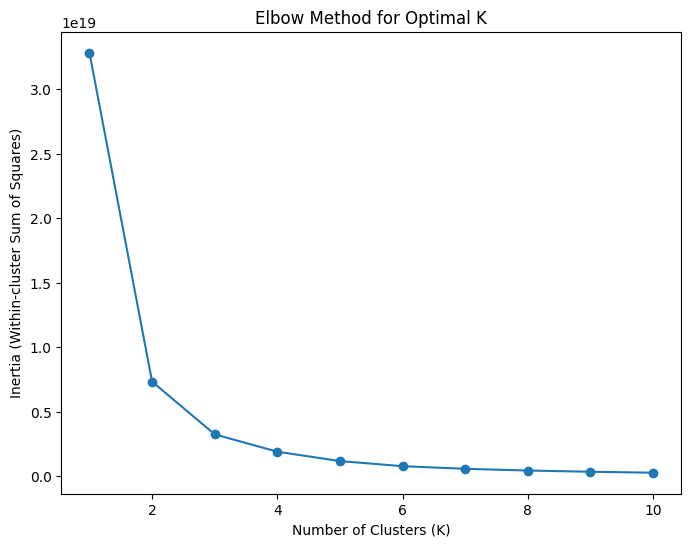

In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

**Part - b: 10.2**

In [20]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data[numerical_columns])
plt.figure(figsize=(10, 7))
plt.scatter(data[numerical_columns[0]], data[numerical_columns[1]], c=cluster_labels, cmap='viridis')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.show()

#The memory error is occuring again and again. Tried PCA , Dimensionality Reduction but the error remains. Tried running on colab and VS code but the error remains same

c:\Users\Nimra Amer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


MemoryError: Unable to allocate 442. GiB for an array with shape (59303097028,) and data type float64